In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import date
import datetime
from datetime import timedelta
import plotly.offline as py

In [2]:
import json

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
os.chdir("C:\\Users\\lenovo\\Desktop\\Pubinno\\Task13(ThalesAnalysis)")
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\Pubinno\\Task13(ThalesAnalysis)'

In [5]:
df = pd.read_excel('thalesbomontif.xlsx')

In [6]:
len(df)

124

# Loading MQTT messages to a dataframe

In [7]:
messages = np.array(df['Message'])

In [8]:
deneme = [None] * 124

In [9]:
i=0
while i< 124:
    deneme[i] = json.loads(messages[i])
    i +=1

In [10]:
mqtts = pd.DataFrame(data = deneme)

In [11]:
mqttsv2=mqtts[mqtts['amount']<4]

In [12]:
backup=mqttsv2

In [13]:
mqttsv2['tgg'].min()

4.107601

In [14]:

from datetime import datetime

In [15]:
timestamp = 1600433962
dt_object = datetime.fromtimestamp(timestamp)

In [16]:
datetimes = []
for time in mqttsv2['time']:
    datetimes.append(datetime.fromtimestamp(time))

In [17]:
mqttsv2['dates']=datetimes

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
import plotly.express as px
import pandas as pd

fig = px.scatter(mqttsv2, x='dates', y='tgg', title='General Looking Ahead Temperatures of Sales')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Btw_pour Analysis

# Seperating sales with regard to their btw_pour

In [19]:
tryit = mqttsv2[(mqttsv2['amount']<4) & (mqttsv2['amount']!=0)]

In [20]:
len(mqttsv2)

104

In [21]:
bpourhigh=mqttsv2[mqttsv2['btw_pour']>180]

In [22]:
bpourlow=mqttsv2[mqttsv2['btw_pour']<=180]

In [23]:
len(bpourlow)

75

In [24]:
bpourtoohigh=bpourhigh[bpourhigh['btw_pour']>600]

In [25]:
len(bpourtoohigh)

23

In [26]:
bpourtoohigh['weighted_avg_temp'] = bpourtoohigh['tgg']*bpourtoohigh['vol_total']
bpourtoohightemp=bpourtoohigh['weighted_avg_temp'].sum()/bpourtoohigh['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
bpourhigh['weighted_avg_temp'] = bpourhigh['tgg']*bpourhigh['vol_total']
bpourhightemp=bpourhigh['weighted_avg_temp'].sum()/bpourhigh['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
bpourlow['weighted_avg_temp'] = bpourlow['tgg']*bpourlow['vol_total']
bpourlowtemp=bpourlow['weighted_avg_temp'].sum()/bpourlow['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Avg temperatures and number of sales of three variances of btw_pour (low, high, too high)

In [29]:
print(bpourtoohightemp)
print(len(bpourtoohigh))

7.069269813865609
23


In [30]:
print(bpourhightemp)
print(len(bpourhigh))

6.897648710993935
29


In [31]:
print(bpourlowtemp)
print(len(bpourlow))

5.595402567177689
75


In [32]:
main_frs = mqttsv2[mqttsv2['main_fr']>0]

In [33]:
#I've initialized this at the next section, but I'm using it now

In [34]:
useit=main_frs[['vol_total','btw_pour','main_fr','tgg','temp_before']]

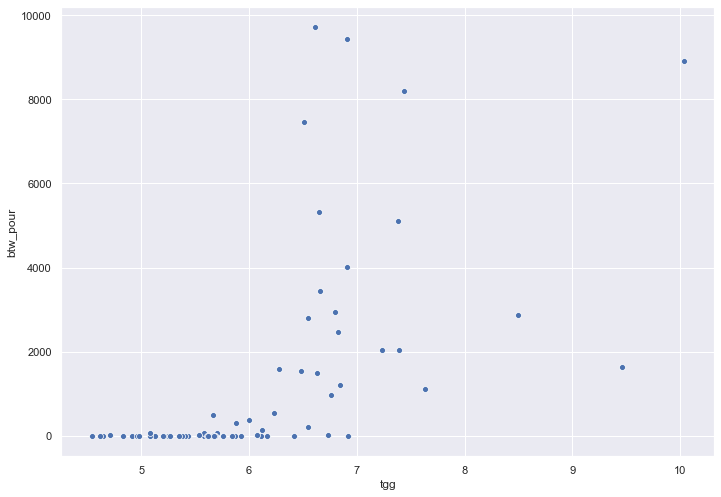

In [35]:
sns.scatterplot(x=useit['tgg'],y=useit['btw_pour'])

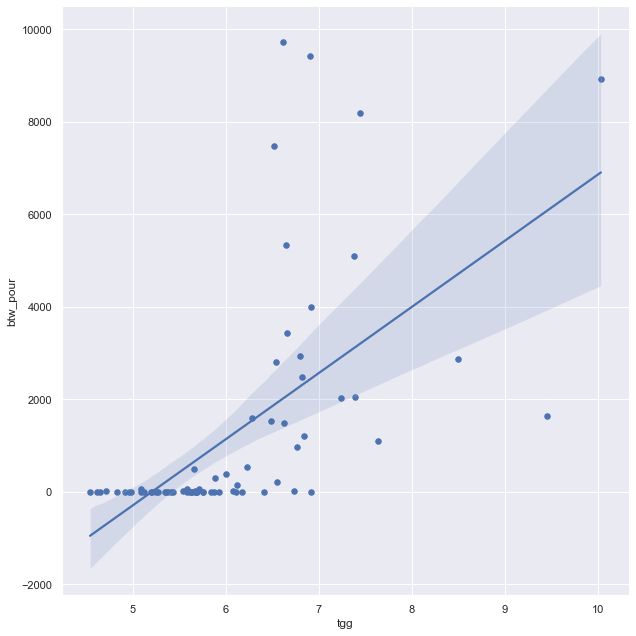

In [36]:
sns.lmplot(x="tgg", y="btw_pour", data=useit, palette="muted", height=9, scatter_kws={"s": 30, "alpha":1})

# Flow rate analysis

In [37]:
mqttsv2['vol_total'].sum()/5700

29.924736842105265

In [38]:
useit[['btw_pour','tgg']].corr()

btw_pour       tgg
btw_pour  1.000000  0.605685
tgg       0.605685  1.000000

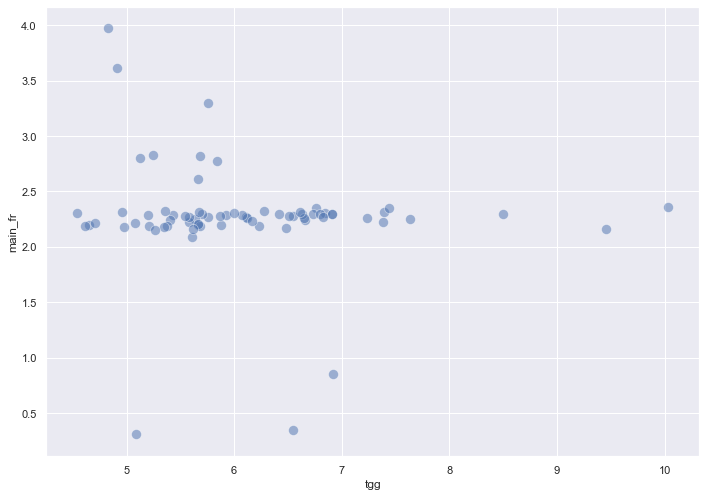

In [39]:
sns.scatterplot(x=useit['tgg'],y=useit['main_fr'],s=100,alpha=0.5)

In [40]:
from scipy.interpolate import interp1d

In [41]:
useitmapped = pd.DataFrame(columns={'btw_pour','main_fr','vol_total','tgg','temp_before'})

In [42]:
useitmapped

Empty DataFrame
Columns: [temp_before, main_fr, tgg, vol_total, btw_pour]
Index: []

In [43]:
m=interp1d([useit['btw_pour'].min(),useit['btw_pour'].max()],[0,10])
useitmapped['btw_pour'] = m(useit['btw_pour'])

m=interp1d([useit['main_fr'].min(),useit['main_fr'].max()],[0,10])
useitmapped['main_fr'] = m(useit['main_fr'])

m=interp1d([useit['vol_total'].min(),useit['vol_total'].max()],[0,10])
useitmapped['vol_total'] = m(useit['vol_total'])

m=interp1d([useit['tgg'].min(),useit['tgg'].max()],[0,10])
useitmapped['tgg'] = m(useit['tgg'])

m=interp1d([useit['temp_before'].min(),useit['temp_before'].max()],[0,10])
useitmapped['temp_before'] = m(useit['temp_before'])

In [44]:
useitmapped

temp_before    main_fr        tgg  vol_total   btw_pour
0      5.683453   5.360335   2.219010   9.594972   0.007208
1      2.194245   5.431560   2.123373   9.594972   0.065905
2      1.438849   5.399560   2.518515   9.594972   0.005149
3      2.877698   5.366522   2.864756   9.585661   0.004119
4      5.035971   5.165520   2.046897   9.590317   0.010298
5     10.000000   5.244788   5.172910   9.594972   5.244568
6      0.719424   5.314565   2.003834   9.585661   0.000000
7      0.395683  10.000000   0.535812   1.573557   0.000000
8      8.597122   5.444866   4.186716   9.599628   1.248069
9      1.043165   5.144722   2.078377   1.480447   0.003089
10     7.733813   5.434353   4.318502   9.585661   4.122130
11     3.165468   5.342460   2.871140   9.455307   0.149315
12     6.582734   5.584016   4.043567   4.813780   1.001957
13     6.906474   5.311728   5.631235   4.171322   1.133766
14     7.482014   5.077399   3.539889   9.594972   1.584801
15     2.805755   5.424261   3.996573   9.390130   0.011327
16     8.381295   5.426978   7.198820   6.424581   2.950263
17     5.971223   5.145651   3.080746   9.590317   0.552981
18     4.820144   5.150151   2.437939   9.590317   0.301720
19     0.899281   8.158168   2.220667   8.766294   0.001030
20     3.956835   5.264420   2.965818   9.594972   0.003089
21     0.143885   5.161798   0.199666   0.805400   0.000000
22     0.251799   5.234163   1.904264   9.590317   0.000000
23     0.359712   6.814314   1.063415   9.594972   0.000000
24     7.482014   5.475054   5.185493   5.181564   2.112038
25     1.618705   5.416213   1.621921   4.818436   0.004119
26     0.503597   5.371785   2.421226   3.775605   0.000000
27     9.388490   5.340968   4.905112   9.585661   2.097621
28     1.438849   5.403714   2.800138   9.087523   0.008238
29     7.661871   5.275452   3.849410   9.599628   3.537226
30     2.553957   5.358944   1.901386   9.590317   0.064875
31     7.625899   5.379043   3.645782   9.590317   2.887447
32     8.165467   5.435353   4.314160   9.590317   9.699310
33     4.604317   9.034864   0.680817   9.585661   0.005149
34     0.719424   6.854455   2.089934   9.594972   0.000000
35     0.215827   6.879235   1.283055   4.823091   0.000000
36     7.625899   5.382309   3.592243   9.590317   7.687159
37     7.194245   5.425322   3.798246   9.590317   1.536402
38     7.625899   5.590937  10.000000   0.018622   9.179281
39     4.604317   5.460355   2.653335   9.590317   0.390279
40     3.165468   5.284442   1.583272   9.585661   0.004119
41     8.848921   5.440409   4.113701   9.594972   3.018227
42     0.431655   5.483337   0.761031   0.000000   0.000000
43     0.683453   5.512361   1.492822   9.590317   0.002060
44     0.395683   5.138234   1.217237   9.594972   0.003089
45     0.143885   5.202442   0.989588   9.585661   0.002060
46     3.776978   5.137737   1.530191   9.594972   0.004119
47     5.107913   5.185111   2.043190   9.594972   0.508701
48     8.201439   5.360253   4.156429   9.594972   2.546597
49     0.683453   5.413292   1.197295   1.527002   0.001030
50     2.661871   0.000000   0.993775   7.541899   0.061786
51     1.079137   4.854899   1.953163  10.000000   0.005149
52     0.143885   5.107775   0.797452   3.319367   0.002060
53     7.589928   5.320407   3.845344   9.585661   5.486562
54     2.985612   5.419168   3.412480   7.746741   0.004119
55     7.302158   5.498853   3.170193   9.594972   1.643497
56     8.237410   5.470840   3.770767   9.585661  10.000000
57     0.000000   6.736858   2.363361   3.221601   0.001030
58     2.805755   0.101895   3.656682   1.401304   0.212131
59     0.647482   1.493786   4.334535   0.405028   0.001030
60     0.467626   5.105805   1.467542   4.813780   0.003089
61     0.107914   6.304158   2.045464   6.135940   0.001030
62     9.172662   5.568622   5.281762   9.594972   8.428586
63     2.338129   5.481962   2.069416   9.590317   0.007208
64     0.395683   5.068564   1.970326   3.635940   0.001030
65     0.287770   5.140541   0.141876   1.14

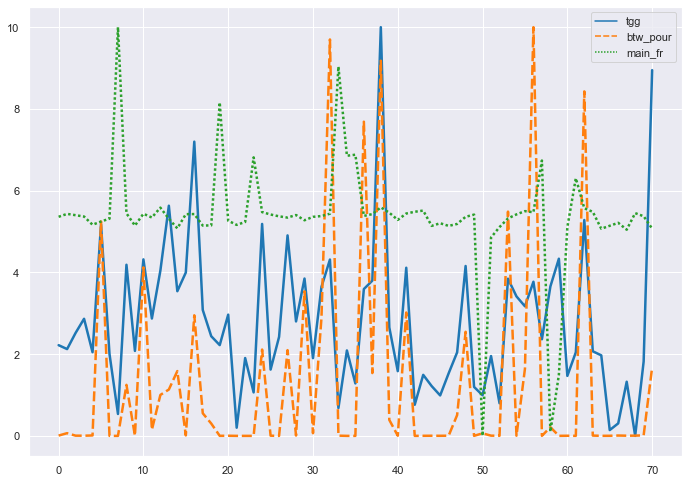

In [45]:
sns.lineplot(data=useitmapped[['tgg','btw_pour','main_fr']], palette="tab10", linewidth=2.5)

In [46]:
# main_fr' nin genel bir değeri var, 
    # azaldığı ve arttığı odd noktalar bizim için önemli,
        # assumptionumuza göre sıcaklık arttığında main_fr arttırılıyor olabilir, şikayetlere göre köpürmeler bu esnada 
        # meydana geliyor olabilir.

# aynı grafiği tgg yerine temp_before ile deneyelim               
    # btw_pour ile temp genel olarak doğru orantılı olduğu için iki değişken üzerinden inceleme yapalım. 

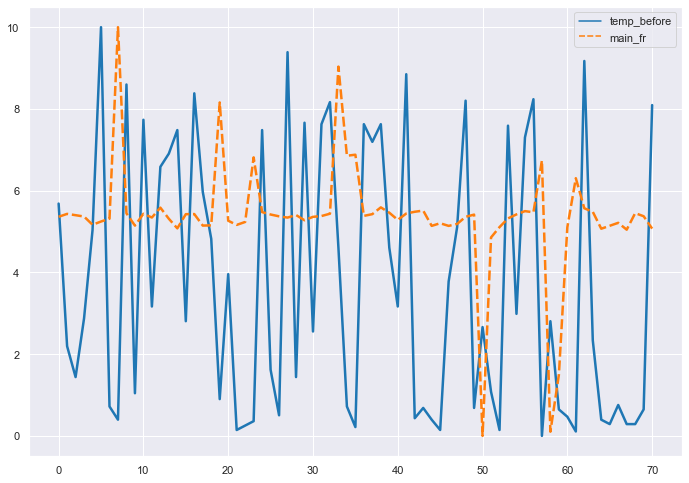

In [47]:
sns.lineplot(data=useitmapped[['temp_before','main_fr']], palette="tab10", linewidth=2.5)

In [48]:
useit[['tgg','btw_pour','main_fr']].corr()

tgg  btw_pour   main_fr
tgg       1.000000  0.605685 -0.129243
btw_pour  0.605685  1.000000  0.011189
main_fr  -0.129243  0.011189  1.000000

# min ve max değerler

In [87]:
mqttsv2['tgg'].max()
mqttsv2['tgg'].min()

4.107601

In [114]:
mqttsv2['main_fr'].max()
useit['main_fr'].mean()

2.27585452112676

In [92]:
useit['btw_pour'].min()
useit['btw_pour'].max()

9712

In [116]:
mqttsv2['temp_before'].max()
mqttsv2['temp_before'].min()


4.1

# 0 Amounts

In [49]:
zeroamounts = mqttsv2[mqttsv2['amount']==0]

In [50]:
notzeroamounts =  mqttsv2[mqttsv2['amount']!=0]

In [51]:
zeroflag=[]
for amount in mqttsv2['amount']:
    if amount == 0:
        zeroflag.append('stopped') 
    else:
        zeroflag.append('not stopped') 

mqttsv2['zeroflag']=zeroflag        

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



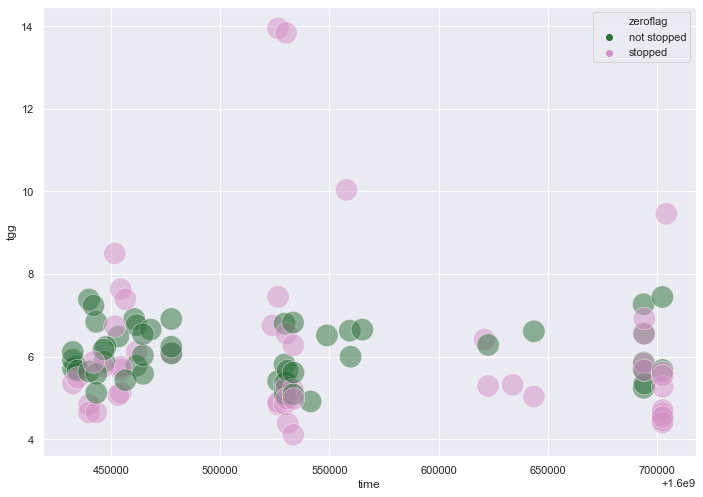

In [52]:
sns.scatterplot(x="time", y="tgg", hue="zeroflag", data=mqttsv2, palette = 'cubehelix', alpha= 0.5, s=500)

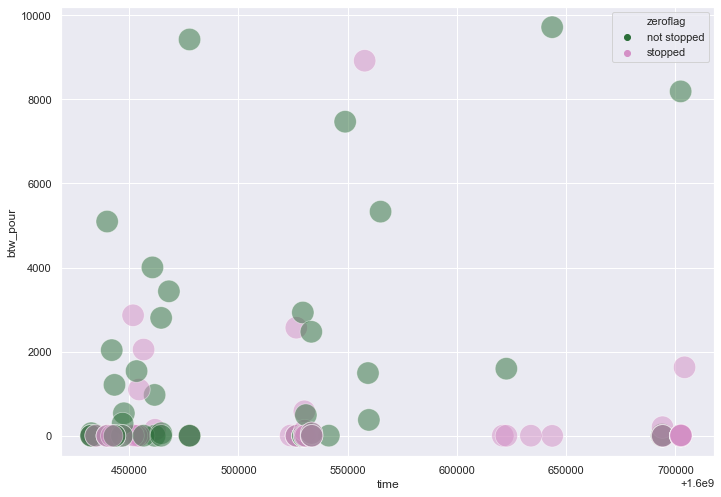

In [53]:
sns.scatterplot(x="time", y="btw_pour", hue="zeroflag", data=mqttsv2, palette = 'cubehelix', alpha= 0.5, s=500)

In [54]:
zeroamounts['weighted_avg_temp'] = zeroamounts['tgg']*zeroamounts['vol_total']
zeroamountssum=zeroamounts['weighted_avg_temp'].sum()/zeroamounts['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
notzeroamounts['weighted_avg_temp'] = notzeroamounts['tgg']*notzeroamounts['vol_total']
notzeroamountssum=notzeroamounts['weighted_avg_temp'].sum()/notzeroamounts['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
notzeroamountssum

6.063006918115475

In [57]:
zeroamountssum

6.178124051459433

# İdeal Bf Musluğu

In [58]:
df = pd.read_excel('kovanbornovabf.xlsx')

len(df)

# Loading MQTT messages to a dataframe

messages = np.array(df['Message'])


In [59]:
deneme = [None] * 196

i=0
while i< 196:
    deneme[i] = json.loads(messages[i])
    i +=1


In [60]:
mqtts = pd.DataFrame(data = deneme)

mqtts

msg_code  selected  amount  vol_exp  vol_total  temp_before  temp_after  \
0           1         0      11        0       2721    28.200001    2.700000   
1           1        50       0     2850       2607    20.299999    2.600000   
2           1        50       0     2850       2392    22.500000    2.900000   
3           1         0      10        0        569    30.500000   14.800000   
4           1        50       2     2850       2852    24.500000    2.800000   
5           1         0      11        0        427    32.400002   15.200000   
6           1         0      11        0        427    32.400002   15.200000   
7           1         0      11        0        185    23.900000   17.600000   
8           1        50       2     2850       2852    21.799999    3.500000   
9           1        50       2     2850       2850     4.900000    3.400000   
10          1        50       2     2850       2851     4.700000    3.200000   
11          1         0      10        0        649     5.000000    3.400000   
12          1        50       2     2850       2853    30.799999    3.400000   
13          1        50       2     2850       2852     6.200000    2.800000   
14          1         0      10        0        570     7.100000    3.200000   
15          1        30       0     1710       1296    28.299999    5.300000   
16          1        50       2     2850       2850    25.100000    3.100000   
17          1        50       2     2850       2852    12.600000    2.400000   
18          1        50       2     2850       2850    26.200001    2.900000   
19          1        50       2     2850       2850     6.100000    2.300000   
20          1        50       2     2850       2854    21.799999    3.400000   
21          1        50       2     2850       2850    19.200001    2.800000   
22          1        50       2     2850       2854     8.900000    2.100000   
23          1        50       2     2850       2854    16.700001    1.900000   
24          1        50       2     2850       2851    26.500000    3.100000   
25          1        50       2     2850       2853     6.000000    3.100000   
26          1        50       2     2850       2851     7.900000    2.600000   
27          1        50       2     2850       2850    19.299999    2.300000   
28          1        50       2     2850       2853    11.000000    1.700000   
29          1        50       2     2850       2850    15.000000    2.400000   
30          1        50       2     2850       2854     3.800000    2.400000   
31          1        30       1     1710       1710     4.900000    2.500000   
32          1        50       2     2850       2858    17.700001    2.300000   
33          1        50       2     2850        532    25.799999    2.000000   
34          1        50       0     2850        193     3.400000    1.400000   
35          1         0      10        0       6561     9.500000    2.600000   
36          1        50       2     2850       2805     6.400000    1.800000   
37          1        50       2     2850       2851     2.600000    2.000000   
38          1        50       2     2850       2850     9.100000    1.700000   
39          1        50       2     2850       2852    25.600000    3.600000   
40          1         0      10        0        350    30.799999   15.300000   
41          1         0      11        0       1740    32.099998    4.600000   
42          1        30       1     1710       1712    29.400000    5.800000   
43          1        50       2     2850       2850    32.400002    4.100000   
44          1        50       2     2850       2854     4.300000    3.800000   
45          1        50       2     2850       2853    29.500000    4.100000   
46          1        50       2     2850       2853    15.300000    2.500000   
47          1        50       2     2850       2852    24.000000    3.100000   
48          1        50       2     2850       2854    12.000000    2.200000   
49   

In [61]:
mqttsv3=mqtts[mqtts['amount']<4]

backup1=mqttsv3

mqttsv3['tgg'].min()


from datetime import datetime

timestamp = 1600433962
dt_object = datetime.fromtimestamp(timestamp)

datetimes = []
for time in mqttsv3['time']:
    datetimes.append(datetime.fromtimestamp(time))

mqttsv3['dates']=datetimes

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
mqttsv3

msg_code  selected  amount  vol_exp  vol_total  temp_before  temp_after  \
1           1        50       0     2850       2607    20.299999    2.600000   
2           1        50       0     2850       2392    22.500000    2.900000   
4           1        50       2     2850       2852    24.500000    2.800000   
8           1        50       2     2850       2852    21.799999    3.500000   
9           1        50       2     2850       2850     4.900000    3.400000   
10          1        50       2     2850       2851     4.700000    3.200000   
12          1        50       2     2850       2853    30.799999    3.400000   
13          1        50       2     2850       2852     6.200000    2.800000   
15          1        30       0     1710       1296    28.299999    5.300000   
16          1        50       2     2850       2850    25.100000    3.100000   
17          1        50       2     2850       2852    12.600000    2.400000   
18          1        50       2     2850       2850    26.200001    2.900000   
19          1        50       2     2850       2850     6.100000    2.300000   
20          1        50       2     2850       2854    21.799999    3.400000   
21          1        50       2     2850       2850    19.200001    2.800000   
22          1        50       2     2850       2854     8.900000    2.100000   
23          1        50       2     2850       2854    16.700001    1.900000   
24          1        50       2     2850       2851    26.500000    3.100000   
25          1        50       2     2850       2853     6.000000    3.100000   
26          1        50       2     2850       2851     7.900000    2.600000   
27          1        50       2     2850       2850    19.299999    2.300000   
28          1        50       2     2850       2853    11.000000    1.700000   
29          1        50       2     2850       2850    15.000000    2.400000   
30          1        50       2     2850       2854     3.800000    2.400000   
31          1        30       1     1710       1710     4.900000    2.500000   
32          1        50       2     2850       2858    17.700001    2.300000   
33          1        50       2     2850        532    25.799999    2.000000   
34          1        50       0     2850        193     3.400000    1.400000   
36          1        50       2     2850       2805     6.400000    1.800000   
37          1        50       2     2850       2851     2.600000    2.000000   
38          1        50       2     2850       2850     9.100000    1.700000   
39          1        50       2     2850       2852    25.600000    3.600000   
42          1        30       1     1710       1712    29.400000    5.800000   
43          1        50       2     2850       2850    32.400002    4.100000   
44          1        50       2     2850       2854     4.300000    3.800000   
45          1        50       2     2850       2853    29.500000    4.100000   
46          1        50       2     2850       2853    15.300000    2.500000   
47          1        50       2     2850       2852    24.000000    3.100000   
48          1        50       2     2850       2854    12.000000    2.200000   
49          1        50       2     2850       2854     9.000000    2.100000   
50          1        50       2     2850       2850    13.100000    1.900000   
51          1        50       2     2850       2854    19.500000    2.600000   
52          1        50       2     2850       2851     4.800000    2.400000   
53          1        50       2     2850       2853     7.000000    2.300000   
54          1        50       2     2850       2854    16.000000    2.700000   
55          1        50       2     2850       2855    15.600000    2.700000   
56          1        50       2     2850       2850    13.800000    2.600000   
57          1        50       2     2850       2851     5.300000    2.400000   
58          1        50       2     2850       2851    22.000000    3.000000   
59   

In [63]:
fig = px.scatter(mqttsv3, x='dates', y='tgg', title='General Looking Ahead Temperatures of Sales')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [64]:
main_frs2 = mqttsv3[mqttsv3['main_fr']>0]

useit2=main_frs2[['vol_total','btw_pour','main_fr','tgg','temp_before']]

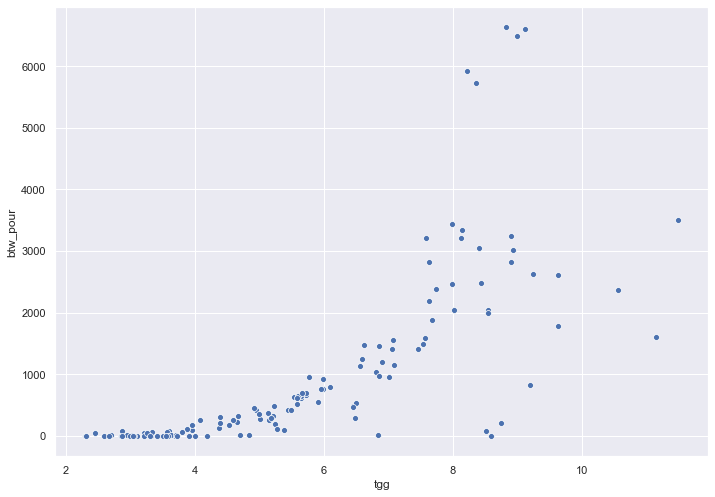

In [65]:
sns.scatterplot(x=useit2['tgg'],y=useit2['btw_pour'])

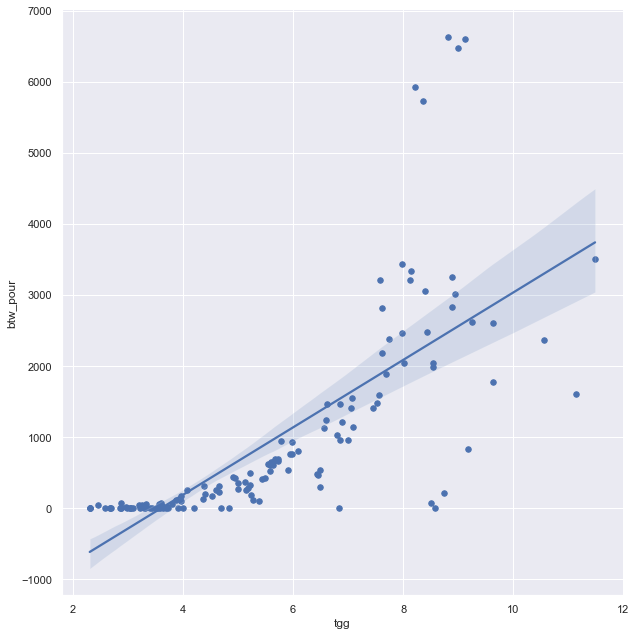

In [66]:
sns.lmplot(x="tgg", y="btw_pour", data=useit2, palette="muted", height=9, scatter_kws={"s": 30, "alpha":1})

In [67]:
mqttsv3.sort_values('time')

msg_code  selected  amount  vol_exp  vol_total  temp_before  temp_after  \
1           1        50       0     2850       2607    20.299999    2.600000   
2           1        50       0     2850       2392    22.500000    2.900000   
4           1        50       2     2850       2852    24.500000    2.800000   
8           1        50       2     2850       2852    21.799999    3.500000   
9           1        50       2     2850       2850     4.900000    3.400000   
10          1        50       2     2850       2851     4.700000    3.200000   
12          1        50       2     2850       2853    30.799999    3.400000   
13          1        50       2     2850       2852     6.200000    2.800000   
15          1        30       0     1710       1296    28.299999    5.300000   
16          1        50       2     2850       2850    25.100000    3.100000   
17          1        50       2     2850       2852    12.600000    2.400000   
18          1        50       2     2850       2850    26.200001    2.900000   
19          1        50       2     2850       2850     6.100000    2.300000   
20          1        50       2     2850       2854    21.799999    3.400000   
21          1        50       2     2850       2850    19.200001    2.800000   
22          1        50       2     2850       2854     8.900000    2.100000   
23          1        50       2     2850       2854    16.700001    1.900000   
24          1        50       2     2850       2851    26.500000    3.100000   
25          1        50       2     2850       2853     6.000000    3.100000   
26          1        50       2     2850       2851     7.900000    2.600000   
27          1        50       2     2850       2850    19.299999    2.300000   
28          1        50       2     2850       2853    11.000000    1.700000   
29          1        50       2     2850       2850    15.000000    2.400000   
30          1        50       2     2850       2854     3.800000    2.400000   
31          1        30       1     1710       1710     4.900000    2.500000   
32          1        50       2     2850       2858    17.700001    2.300000   
33          1        50       2     2850        532    25.799999    2.000000   
34          1        50       0     2850        193     3.400000    1.400000   
36          1        50       2     2850       2805     6.400000    1.800000   
37          1        50       2     2850       2851     2.600000    2.000000   
38          1        50       2     2850       2850     9.100000    1.700000   
39          1        50       2     2850       2852    25.600000    3.600000   
42          1        30       1     1710       1712    29.400000    5.800000   
43          1        50       2     2850       2850    32.400002    4.100000   
44          1        50       2     2850       2854     4.300000    3.800000   
45          1        50       2     2850       2853    29.500000    4.100000   
46          1        50       2     2850       2853    15.300000    2.500000   
47          1        50       2     2850       2852    24.000000    3.100000   
48          1        50       2     2850       2854    12.000000    2.200000   
49          1        50       2     2850       2854     9.000000    2.100000   
50          1        50       2     2850       2850    13.100000    1.900000   
51          1        50       2     2850       2854    19.500000    2.600000   
52          1        50       2     2850       2851     4.800000    2.400000   
53          1        50       2     2850       2853     7.000000    2.300000   
54          1        50       2     2850       2854    16.000000    2.700000   
55          1        50       2     2850       2855    15.600000    2.700000   
56          1        50       2     2850       2850    13.800000    2.600000   
57          1        50       2     2850       2851     5.300000    2.400000   
58          1        50       2     2850       2851    22.000000    3.000000   
59   

In [68]:
mqttsv3['vol_total'].sum()/5700

79.22842105263157

In [69]:
zeroamounts2 = mqttsv3[mqttsv3['amount']==0]

notzeroamounts2 =  mqttsv3[mqttsv3['amount']!=0]

In [70]:
zeroflag2=[]
for amount in mqttsv3['amount']:
    if amount == 0:
        zeroflag2.append('stopped') 
    else:
        zeroflag2.append('not stopped') 

In [71]:
mqttsv3['zeroflag']=zeroflag2       

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Graph of Ideal Bomonti Filtresiz Tap

In [99]:
mqttsv3=mqttsv3.sort_values('dates')

In [100]:
mqttsv3

msg_code  selected  amount  vol_exp  vol_total  temp_before  temp_after  \
1           1        50       0     2850       2607    20.299999    2.600000   
2           1        50       0     2850       2392    22.500000    2.900000   
4           1        50       2     2850       2852    24.500000    2.800000   
8           1        50       2     2850       2852    21.799999    3.500000   
9           1        50       2     2850       2850     4.900000    3.400000   
10          1        50       2     2850       2851     4.700000    3.200000   
12          1        50       2     2850       2853    30.799999    3.400000   
13          1        50       2     2850       2852     6.200000    2.800000   
15          1        30       0     1710       1296    28.299999    5.300000   
16          1        50       2     2850       2850    25.100000    3.100000   
17          1        50       2     2850       2852    12.600000    2.400000   
18          1        50       2     2850       2850    26.200001    2.900000   
19          1        50       2     2850       2850     6.100000    2.300000   
20          1        50       2     2850       2854    21.799999    3.400000   
21          1        50       2     2850       2850    19.200001    2.800000   
22          1        50       2     2850       2854     8.900000    2.100000   
23          1        50       2     2850       2854    16.700001    1.900000   
24          1        50       2     2850       2851    26.500000    3.100000   
25          1        50       2     2850       2853     6.000000    3.100000   
26          1        50       2     2850       2851     7.900000    2.600000   
27          1        50       2     2850       2850    19.299999    2.300000   
28          1        50       2     2850       2853    11.000000    1.700000   
29          1        50       2     2850       2850    15.000000    2.400000   
30          1        50       2     2850       2854     3.800000    2.400000   
31          1        30       1     1710       1710     4.900000    2.500000   
32          1        50       2     2850       2858    17.700001    2.300000   
33          1        50       2     2850        532    25.799999    2.000000   
34          1        50       0     2850        193     3.400000    1.400000   
36          1        50       2     2850       2805     6.400000    1.800000   
37          1        50       2     2850       2851     2.600000    2.000000   
38          1        50       2     2850       2850     9.100000    1.700000   
39          1        50       2     2850       2852    25.600000    3.600000   
42          1        30       1     1710       1712    29.400000    5.800000   
43          1        50       2     2850       2850    32.400002    4.100000   
44          1        50       2     2850       2854     4.300000    3.800000   
45          1        50       2     2850       2853    29.500000    4.100000   
46          1        50       2     2850       2853    15.300000    2.500000   
47          1        50       2     2850       2852    24.000000    3.100000   
48          1        50       2     2850       2854    12.000000    2.200000   
49          1        50       2     2850       2854     9.000000    2.100000   
50          1        50       2     2850       2850    13.100000    1.900000   
51          1        50       2     2850       2854    19.500000    2.600000   
52          1        50       2     2850       2851     4.800000    2.400000   
53          1        50       2     2850       2853     7.000000    2.300000   
54          1        50       2     2850       2854    16.000000    2.700000   
55          1        50       2     2850       2855    15.600000    2.700000   
56          1        50       2     2850       2850    13.800000    2.600000   
57          1        50       2     2850       2851     5.300000    2.400000   
58          1        50       2     2850       2851    22.000000    3.000000   
59   

In [101]:
#portio of the stopped sales
len(mqttsv3[mqttsv3['zeroflag']=='stopped'])/len(mqttsv3)

0.12643678160919541

In [102]:
# avg temperature of this tap
mqttsv3['weighted_avg_temp'] = mqttsv3['tgg']*mqttsv3['vol_total']
mqttsv3['weighted_avg_temp'].sum()/mqttsv3['vol_total'].sum()

4.61206030224844

In [103]:
# avg temperature of efes' stopped sales
efeszero=mqttsv3[mqttsv3['zeroflag']=='stopped']
efeszero['weighted_avg_temp'] = efeszero['tgg']*efeszero['vol_total']
efeszero['weighted_avg_temp'].sum()/efeszero['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6.294163479977916

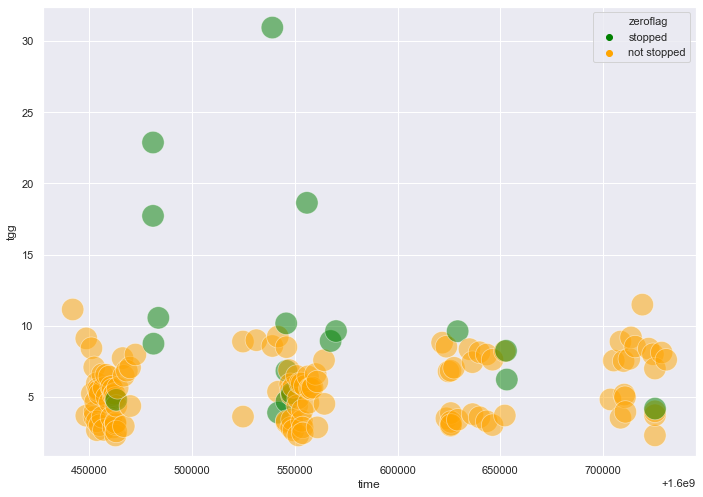

In [104]:
figure1=sns.scatterplot(x="time", y="tgg", hue="zeroflag", palette=['green','orange'], data=mqttsv3, alpha= 0.5, s=500)

# Graph of Bomonti Filtresiz Tap

In [105]:
#portio of the stopped sales
len(mqttsv2[mqttsv2['zeroflag']=='stopped'])/len(mqttsv2)

0.49038461538461536

In [106]:
# avg temperature of this tap
mqttsv2['weighted_avg_temp'] = mqttsv2['tgg']*mqttsv2['vol_total']
mqttsv2['weighted_avg_temp'].sum()/mqttsv2['vol_total'].sum()

6.096371591601152

In [107]:
# avg temperature of bomonti's stopped sales
bomontizero=mqttsv2[mqttsv2['zeroflag']=='stopped']
bomontizero['weighted_avg_temp'] = bomontizero['tgg']*bomontizero['vol_total']
bomontizero['weighted_avg_temp'].sum()/bomontizero['vol_total'].sum()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6.178124051459433

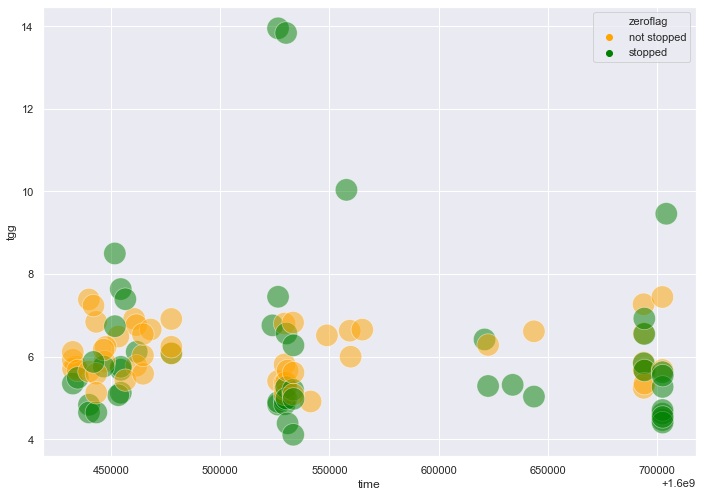

In [108]:
figure2=sns.scatterplot(x="time", y="tgg", hue="zeroflag",palette=['orange','green'], data=mqttsv2, alpha= 0.5, s=500)

In [109]:
mqttsv2['sc_ang_modified']=(mqttsv2['sc_ang']/0.152)/(mqttsv2['sc_ang']+(4.785/0.152))

In [110]:
x=mqttsv2['main_fr']/mqttsv2['sc_ang_modified']

In [111]:
y=pd.DataFrame()
y['lowp']=x

In [112]:
y=y[y['lowp']>0]

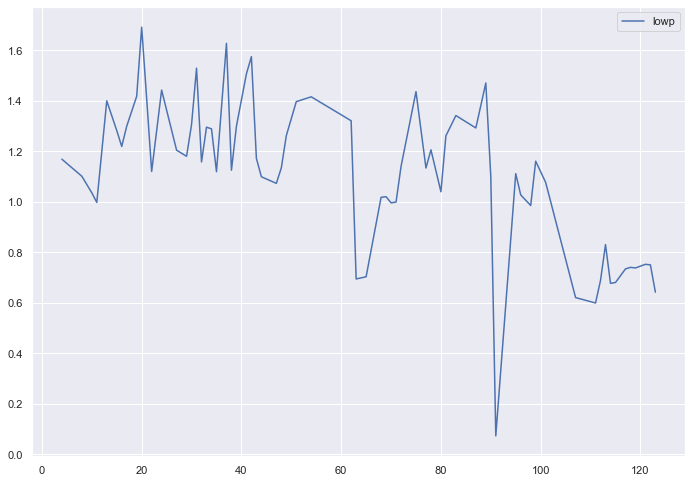

In [113]:
y.plot()

In [98]:
mqttsv2

msg_code  selected  amount  vol_exp  vol_total  temp_before  temp_after  \
4           1        48       2     2736       2738    19.900000         5.1   
7           1        10       3      570        572     7.100000         5.5   
8           1        48       2     2736       2738    10.200000         4.4   
9           1        30       0     1710        207     5.700000         4.8   
10          1        48       2     2736       2738     8.100000         5.0   
11          1        48       2     2736       2736    12.100000         5.3   
13          1        48       2     2736       2737    18.100000         5.6   
14          1        10       0      570        269     6.000000         4.2   
15          1        48       2     2736       2738    31.900000         6.2   
16          1        48       2     2736       2736     6.100000         5.3   
17          1        48       0     2736       1015     5.200000         4.1   
18          1        48       0     2736        381     4.600000         4.2   
19          1        48       2     2736       2739    28.000000         5.0   
20          1        30       0     1710        995     7.000000         4.4   
21          1        48       2     2736       2736    25.600000         5.7   
22          1        48       0     2736       2708    12.900000         4.3   
23          1        10       3      570        573     6.300000         4.5   
24          1        30       1     1710       1711    22.400000         4.9   
25          1        10       0      570        220     6.800000         4.4   
26          1        30       0     1710        514     9.200000         4.1   
27          1        48       0     2736       1573    23.299999         5.4   
28          1        30       0     1710        344     6.000000         4.4   
29          1        48       2     2736       2738    24.900000         5.6   
30          1        48       0     2736       2694    11.900000         5.4   
31          1        48       0     2736       2057    27.400000         7.2   
32          1        48       2     2736       2737    20.700001         4.8   
33          1        48       2     2736       2737    17.500000         4.5   
34          1        48       0     2736       2560     6.600000         4.7   
35          1        48       2     2736       2738    15.100000         5.8   
37          1        48       0     2736        850     4.500000         4.4   
38          1        48       2     2736       2737     4.800000         4.4   
39          1        48       2     2736       2738     5.100000         4.7   
41          1        48       0     2736       1790    24.900000         5.6   
42          1        30       1     1710       1712     8.600000         4.9   
43          1        48       0     2736       1488     5.500000         4.9   
44          1        48       2     2736       2736    30.200001         5.4   
47          1        48       0     2736       2629     8.100000         4.7   
48          1        48       2     2736       2739    25.400000         5.3   
49          1        48       2     2736       2737    11.200000         4.5   
50          1        10       3      570        572     6.800000         4.3   
51          1        48       2     2736       2737    25.299999         5.6   
52          1        10       3      570        573     6.900000         4.3   
53          1        10       3      570        573     7.700000         4.4   
54          1        48       2     2736       2737    26.799999         5.4   
55          1        48       0     2736        577     5.800000         4.6   
57          1        10       0      570        560     8.000000         4.2   
59          1        48       0     2736        389    28.000000         8.3   
60          1        48       0     2736        424    10.300000         5.5   
62          1        48       2     2736       2736    16.900000         5.3   
63   